# Avance del proyecto
### Detección de Automobiles Mediante AUV Basado en Transfer learning
### Reconocimiento de X & y 

In [1]:
'''Librerias'''
import h5py
import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
from keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''Testeo de datos'''
test_size    = 0.20
seed         = 6
h5_color     = 'C:/Users/Junior/Desktop/Proyecto mineria/Features_Data/color_features.h5'
h5_colorLb   = 'C:/Users/Junior/Desktop/Proyecto mineria/Features_Data/color_features_labels.h5'
h5_texture   = 'C:/Users/Junior/Desktop/Proyecto mineria/Features_Data/textural_features.h5'
h5_textureLb = 'C:/Users/Junior/Desktop/Proyecto mineria/Features_Data/textural_features_labels.h5'
scoring      = {'accuracy' : make_scorer(accuracy_score),
                'f1_score' : make_scorer(f1_score, average = 'weighted'), 
                'precision' : make_scorer(precision_score, average = 'weighted'),
                'recall' : make_scorer(recall_score, average = 'weighted')}

In [4]:
'''Normalización'''

'''importar el vector de características y las etiquetas entrenadas'''

h5f_color   = h5py.File(h5_color, 'r')
h5f_colorLb = h5py.File(h5_colorLb, 'r')

color_features_string          = h5f_color['Vehicle_Color_Features']
color_features_labels_string   = h5f_colorLb['Vehicle_Color_Features_Labels']

color_features = np.array(color_features_string)
color_features_labels  = np.array(color_features_labels_string)

h5f_color.close()
h5f_colorLb.close()

'''verificar la forma del vector de características y las etiquetas'''

print("[STATUS] features shape: {}".format(color_features.shape))
print("[STATUS] labels shape: {}".format(color_features_labels.shape))
print("[STATUS] training started...")

'''Dividir X & y'''
x = global_features
Y = color_features_labels

[STATUS] features shape: (2400, 4512)
[STATUS] labels shape: (400, 512)
[STATUS] training started...


In [6]:
'''Dividir X & y'''
x = global_features
Y = color_features_labels

# MobileNetV2

In [7]:
'''Librerias para MobileNet'''
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import model_from_json
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import numpy as np

In [7]:
'''Definicion de '''
x_train, x_test, y_train, y_test = train_test_split(x, Y,
                                        test_size   = test_size,
                                        random_state = seed)

x_train.shape,x_test.shape

(x_train, x_valid) = x_train[2000:], x_train[:2000]
(y_train, y_valid) = y_train[2000:], y_train[:2000]

#print the shape of x_train, x_valid, and x_test

print('x_train =', x_train.shape)
print('x_valid =', x_train.shape)
print('x_test =', x_train.shape)

x_train = (4500, 32, 32, 3)
x_valid = (4500, 32, 32, 3)
x_test = (4500, 32, 32, 3)


In [9]:
'''Verificación datos de entrada y etiquetas correspondientes'''
for image_path in dataset_paths:
  label = image_path.split(os.path.sep)[-2]
  image=load_img(image_path,target_size=(80,80))
  image=img_to_array(image)

'''Impresión de datos'''
print("[INFO] Find {:d} images with {:d} classes".format(len(X),len(set(labels))))

'''guardar el archivo de etiqueta para que podamos usarlo en otro script'''
np.save('license_character_classes.npy', lb.classes_)

[INFO] Find 5.567 images with 3 classes


In [10]:
'''Definir modelo básico'''
def create_model(lr=1e-4,decay=1e-4/25, training=False,output_shape=y.shape[1]):
    #Determinar modelo MobileNet
    baseModel = MobileNetV2(weights="imagenet", 
                            include_top=False,
                            input_tensor=Input(shape=(80, 80, 3)))
    #Caraterización del modelo y capas
    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(3, 3))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(128, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(output_shape, activation="softmax")(headModel)
    '''Defición final del modelo'''
    model = Model(inputs=baseModel.input, outputs=headModel)
    
    if training:
        # definir capa entrenable
        for layer in baseModel.layers:
            layer.trainable = True
        # Compilar modelo
        optimizer = Adam(lr=lr, decay = decay)
        model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])    
        
    return model

In [14]:
'''Inicializar el hiperparámetro inicial'''
INIT_LR = 1e-4
'''Vueltas'''
EPOCHS = 30
'''Definición de modelo'''
model = create_model(lr=INIT_LR, decay=INIT_LR/EPOCHS,training=True)

9412608/9406464 [==============================] - 4h34s 4us/step


In [15]:
'''Definir peso'''
BATCH_SIZE = 64
'''Definición de modelo'''
my_checkpointer = [
                EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                ModelCheckpoint(filepath="Vehicle_Color_Features_Labels.h5", verbose=1, save_weights_only=True)
                ]
#Impresión de resultados
result = model.fit_generator(image_gen.flow(trainX, trainY, batch_size=64), 
                   steps_per_epoch=len(trainX) // BATCH_SIZE, 
                   validation_data=(testX, testY), 
                   validation_steps=len(testX) // BATCH_SIZE, 
                   epochs=EPOCHS, callbacks=my_checkpointer)

Epoch 1/30
12/12 [==============================] - ETA: 0s - loss: 1.3502 - accuracy: 0.6237
Epoch 00001: saving model to License_character_recognition.h5
12/12 [==============================] - 2s 180ms/step - loss: 1.3502 - accuracy: 0.6237 - val_loss: 3.4287 - val_accuracy: 0.3478
Epoch 2/30
12/12 [==============================] - ETA: 0s - loss: 1.2676 - accuracy: 0.6575
Epoch 00002: saving model to License_character_recognition.h5
12/12 [==============================] - 2s 184ms/step - loss: 1.2676 - accuracy: 0.6575 - val_loss: 2.9684 - val_accuracy: 0.3478
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 0.9559 - accuracy: 0.7244
Epoch 00003: saving model to License_character_recognition.h5
12/12 [==============================] - 2s 145ms/step - loss: 0.9559 - accuracy: 0.7244 - val_loss: 2.8284 - val_accuracy: 0.3913
Epoch 4/30
12/12 [==============================] - ETA: 0s - loss: 0.8010 - accuracy: 0.7769
Epoch 00004: saving model to License_characte

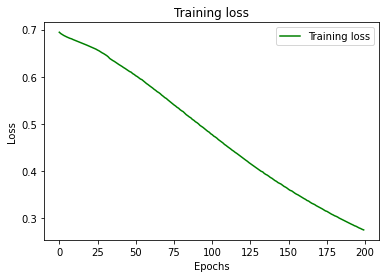

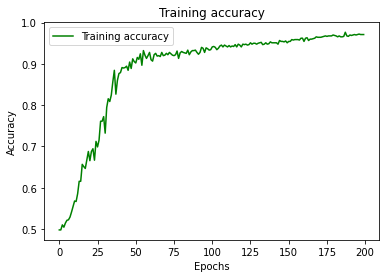

In [18]:
'''Determinar una aproximación en los 200 epochs'''
model = ann3.fit(x_train, y_train, batch_size=16, epochs=200)
plt.plot(model.epoch, model.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
'''Mostrar training loss'''
plt.show()
plt.plot(model4.epoch, model4.history["accuracy"], 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
'''Mostrar training accuracy'''
plt.show()

In [20]:
'''Evaluar el modelo'''
model_probs = model.predict(test_ds, verbose=0)
'''Para evaluar el modelo, usamos una función de Keras llamada *evaluar* e imprimimos los resultados'''
model_classes = np.argmax(model_probs,axis=1)
'''reduce to 1d array'''
model_probs = model_probs[:, 0]
'''accuracy: (tp + tn) / (p + n)'''
accuracy = accuracy_score(test_labels, model_classes)*100
'''f1: 2 tp / (2 tp + fp + fn)'''
f1 = f1_score(test_labels, model_classes, average='weighted')*100
'''recall: tp / (tp + fn)'''
recall = recall_score(test_labels, model_classes, average='weighted')*100

'''Mostrar lo'''
print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Recall: %.2f' % recall)

Accuracy: 90.39
F1 score: 82.44
Recall: 88.73
